In [14]:
import pandas as pd
import plotly.graph_objects as go

# Step 1: Load data
df = pd.read_csv("my_energy.csv", sep=';',decimal=',')

# Step 2: Filter by date range
start_date = '2025-07-19'
end_date = '2025-07-23'
df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Step 3: Prepare Sankey nodes and links
days = df_filtered['Date'].unique().tolist()
modules = df_filtered['Module'].unique().tolist()

nodes = days + modules

# Map names to index
node_indices = {name: idx for idx, name in enumerate(nodes)}

# Step 4: Create source and target flows
source = [node_indices[row['Date']] for _, row in df_filtered.iterrows()]
target = [node_indices[row['Module']] for _, row in df_filtered.iterrows()]
values = df_filtered['Hours'].tolist()  # or you can use Energy

# Step 5: Plot Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=18,
        thickness=15,
        label=nodes,
    ),
    link=dict(
        source=source,
        target=target,
        value=values
    ))])

fig.update_layout(title_text="Daily Study Flow", font_size=18)
fig.show()


In [25]:
import pandas as pd
import plotly.graph_objects as go
import random

# Step 1: Load data
df = pd.read_csv("my_energy.csv", sep=';', decimal=',')

# Step 2: Filter by date range
start_date = '2025-07-16'
end_date = '2025-07-20'
df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Step 3: Prepare Sankey nodes and links
days = df_filtered['Date'].unique().tolist()
modules = df_filtered['Module'].unique().tolist()
nodes = days + modules

# Generate vibrant colors
def generate_colors(n):
    return [f'hsl({random.randint(0, 360)}, {random.randint(70, 100)}%, {random.randint(50, 70)}%)' 
            for _ in range(n)]

node_colors = generate_colors(len(nodes))
link_colors = [f'rgba({random.randint(0, 255)}, {random.randint(100, 200)}, {random.randint(150, 255)}, 0.6)'
               for _ in range(len(df_filtered))]

# Map names to index
node_indices = {name: idx for idx, name in enumerate(nodes)}

# Step 4: Create flows
source = [node_indices[row['Date']] for _, row in df_filtered.iterrows()]
target = [node_indices[row['Module']] for _, row in df_filtered.iterrows()]
values = df_filtered['Hours'].tolist()

# Step 5: Plot Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=25,
        thickness=20,
        line=dict(color='black', width=0.8),
        label=nodes,
        color=node_colors,
        hovertemplate='%{label}<extra></extra>'
    ),
    link=dict(
        source=source,
        target=target,
        value=values,
        color=link_colors,
        hovertemplate='%{source.label} → %{target.label}<br>Hours: %{value}<extra></extra>'
    ))
])

# Visual enhancements
fig.update_layout(
    title_text="<b>Daily Study Energy Flow</b>",
    title_font=dict(size=24, color='darkblue', family="Arial Black"),
    font=dict(size=14, family="Verdana"),
    plot_bgcolor='rgba(245,245,255,0.9)',
    paper_bgcolor='lavender',
    hoverlabel=dict(
        bgcolor="white",
        font_size=14,
        font_family="Rockwell"
    )
)

# Add annotation
fig.add_annotation(
    text="💡 Width = Study Hours",
    x=0.9, y=1.1,
    showarrow=False,
    font=dict(size=12, color="purple")
)

fig.show()

In [16]:
import pandas as pd
import plotly.graph_objects as go

# Step 1: Load data
df = pd.read_csv("my_energy.csv", sep=';', decimal=',')

# Step 2: Filter by date range
start_date = '2025-07-19'
end_date = '2025-07-23'
df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Step 3: Prepare Sankey nodes and links
days = df_filtered['Date'].unique().tolist()
modules = df_filtered['Module'].unique().tolist()

nodes = days + modules

# Map names to index
node_indices = {name: idx for idx, name in enumerate(nodes)}

# Step 4: Create source and target flows
source = [node_indices[row['Date']] for _, row in df_filtered.iterrows()]
target = [node_indices[row['Module']] for _, row in df_filtered.iterrows()]
values = df_filtered['Hours'].tolist()  # or you can use Energy

# Optional: Generate colors for links
import random

colors = ['rgba({},{},{},0.8)'.format(random.randint(50, 255), random.randint(50, 255), random.randint(50, 255)) for _ in range(len(source))]

# Step 5: Plot Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=18,
        thickness=15,
        label=nodes,
        color='rgba(100, 100, 100, 0.8)',  # neutral gray nodes, can customize per node if needed
    ),
    link=dict(
        source=source,
        target=target,
        value=values,
        color=colors
    ))])

fig.update_layout(title_text="Daily Study Flow", font_size=18)
fig.show()


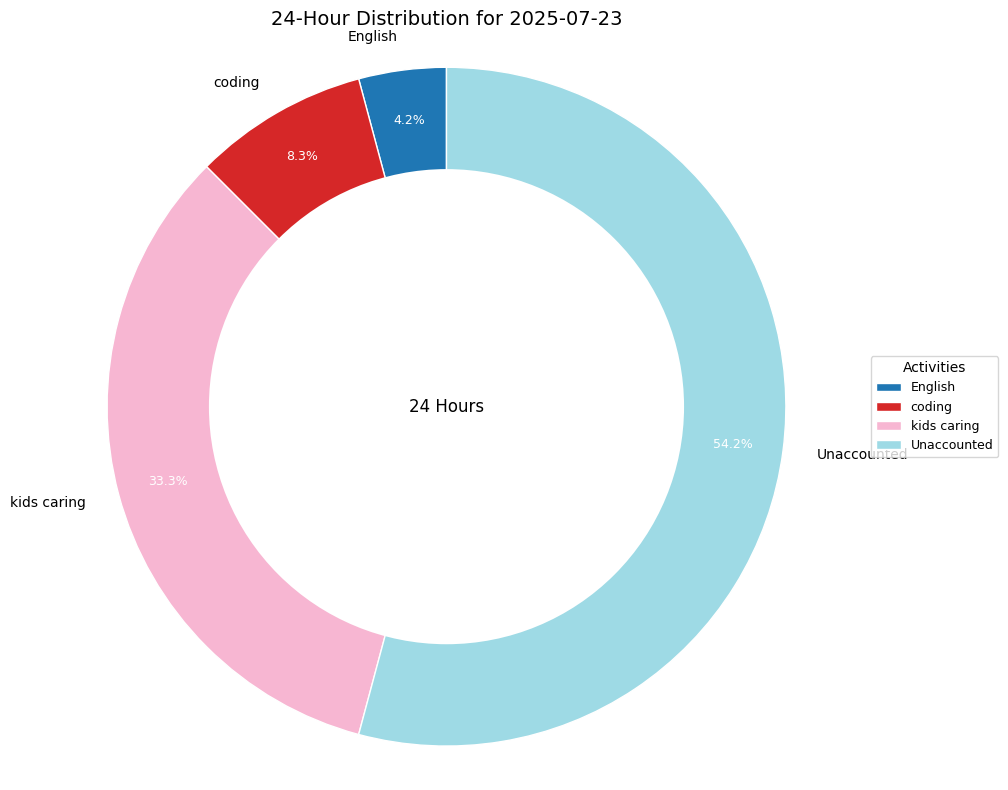


Hours distribution for 2025-07-23:
English: 1.0 hours (4.2%)
coding: 2.0 hours (8.3%)
kids caring: 8.0 hours (33.3%)
Unaccounted: 13.0 hours (54.2%)


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

try:
    # Read the CSV with semicolon separator
    df = pd.read_csv('my_energy.csv', sep=';',decimal=',')
    
    # Convert 'Hours' to numeric if it's not already
    df['Hours'] = pd.to_numeric(df['Hours'], errors='coerce')
    
    # Filter for a specific date if needed (using the first date in the dataset)
    unique_dates = df['Date'].unique()
    selected_date = '2025-07-23'  # You can change this to select a specific date
    
    # Filter data for the selected date
    day_df = df[df['Date'] == selected_date]
    
    # Group by Module and sum the hours for this day
    module_hours = day_df.groupby('Module')['Hours'].sum()
    
    # Calculate hours spent on tracked activities
    tracked_hours = module_hours.sum()
    
    # Add "Unaccounted" time to complete the 24 hours
    if tracked_hours < 24:
        module_hours['Unaccounted'] = 24 - tracked_hours
    
    # Create the pie chart
    plt.figure(figsize=(10, 8))
    
    # Generate colors - use a specific color palette
    colors = plt.cm.tab20(np.linspace(0, 1, len(module_hours)))
    
    # Create the pie chart
    wedges, texts, autotexts = plt.pie(
        module_hours, 
        labels=module_hours.index, 
        colors=colors,
        autopct='%1.1f%%', 
        startangle=90, 
        pctdistance=0.85,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1}
    )
    
    # Customize text properties
    for text in texts:
        text.set_fontsize(10)
    for autotext in autotexts:
        autotext.set_fontsize(9)
        autotext.set_color('white')
    
    # Add a white circle to make it a donut chart (optional)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.axis('equal')
    plt.title(f'24-Hour Distribution for {selected_date}', fontsize=14)
    
    # Add total in the center
    plt.text(0, 0, "24 Hours", ha='center', va='center', fontsize=12)
    
    # Add a legend
    plt.legend(
        title="Activities", 
        loc="center left", 
        bbox_to_anchor=(1, 0, 0.5, 1),
        fontsize=9
    )
    
    plt.tight_layout()
    plt.show()
    
    # Print the breakdown
    print(f"\nHours distribution for {selected_date}:")
    for activity, hours in module_hours.items():
        print(f"{activity}: {hours} hours ({hours/24*100:.1f}%)")
    
except FileNotFoundError:
    print("Error: The file 'my_energy.csv' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")
    import traceback
    traceback.print_exc()

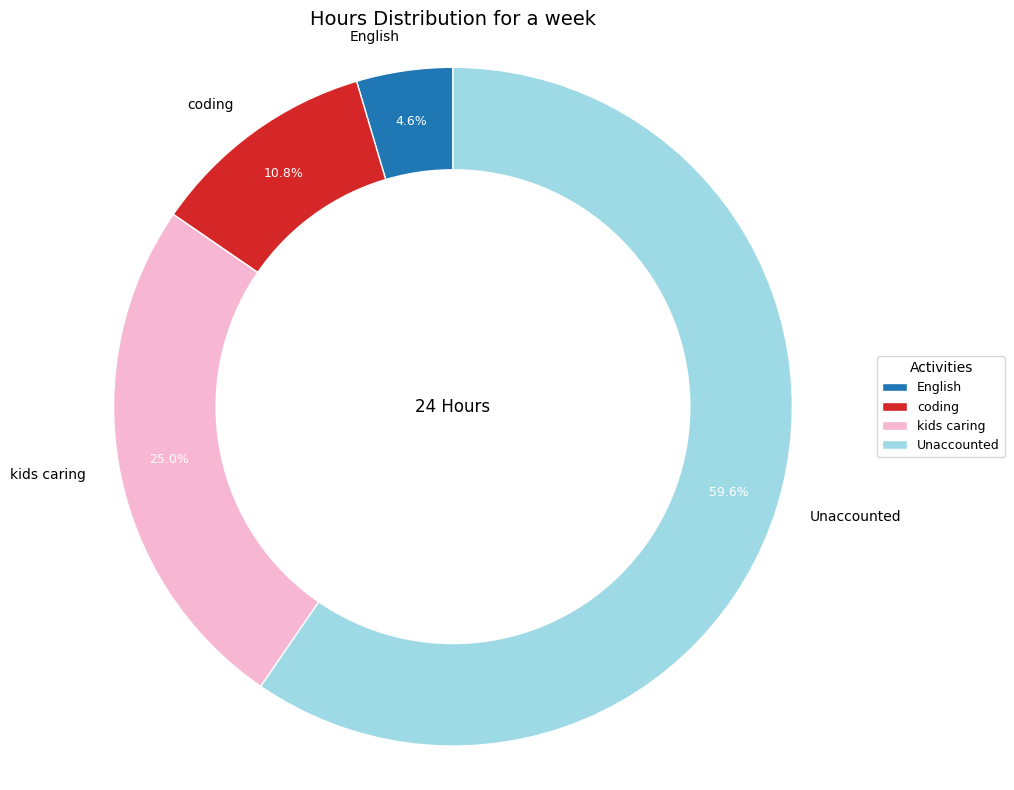


Hours distribution for 2025-07-23:
English: 5.5 hours (22.9%)
coding: 13.0 hours (54.2%)
kids caring: 30.0 hours (125.0%)
Unaccounted: 71.5 hours (297.9%)


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

try:
    # Read the CSV with semicolon separator
    df = pd.read_csv('my_energy.csv', sep=';',decimal=',')
    
    # Convert 'Hours' to numeric if it's not already
    df['Hours'] = pd.to_numeric(df['Hours'], errors='coerce')


    # Filter for the week (e.g., July 19 to July 23)
    week_df = df[(df['Date'] >= '2025-07-19') & (df['Date'] <= '2025-07-23')]

    # Group by Module and sum the hours for the week
    module_hours = week_df.groupby('Module')['Hours'].sum()

    # Calculate hours spent on tracked activities
    tracked_hours = module_hours.sum()

    # Add "Unaccounted" time to complete the total hours (e.g., 24 hours * number of days)
    total_hours = 24 * len(week_df['Date'].unique())
    if tracked_hours < total_hours:
        module_hours['Unaccounted'] = total_hours - tracked_hours

# Then plot the pie chart as before, using module_hours
    
    # Create the pie chart
    plt.figure(figsize=(10, 8))
    
    # Generate colors - use a specific color palette
    colors = plt.cm.tab20(np.linspace(0, 1, len(module_hours)))
    
    # Create the pie chart
    wedges, texts, autotexts = plt.pie(
        module_hours, 
        labels=module_hours.index, 
        colors=colors,
        autopct='%1.1f%%', 
        startangle=90, 
        pctdistance=0.85,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1}
    )
    
    # Customize text properties
    for text in texts:
        text.set_fontsize(10)
    for autotext in autotexts:
        autotext.set_fontsize(9)
        autotext.set_color('white')
    
    # Add a white circle to make it a donut chart (optional)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.axis('equal')
    plt.title(f'Hours Distribution for a week', fontsize=14)
    
    # Add total in the center
    plt.text(0, 0, "24 Hours", ha='center', va='center', fontsize=12)
    
    # Add a legend
    plt.legend(
        title="Activities", 
        loc="center left", 
        bbox_to_anchor=(1, 0, 0.5, 1),
        fontsize=9
    )
    
    plt.tight_layout()
    plt.show()
    
    # Print the breakdown
    print(f"\nHours distribution for {selected_date}:")
    for activity, hours in module_hours.items():
        print(f"{activity}: {hours} hours ({hours/24*100:.1f}%)")
    
except FileNotFoundError:
    print("Error: The file 'my_energy.csv' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")
    import traceback
    traceback.print_exc()

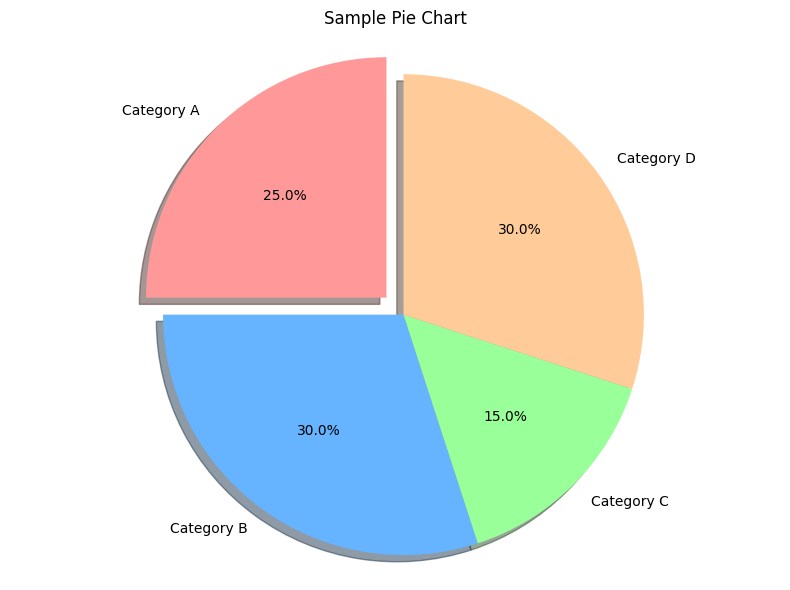

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
labels = ['Category A', 'Category B', 'Category C', 'Category D']
sizes = [25, 30, 15, 30]
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
explode = (0.1, 0, 0, 0)  # explode the 1st slice (Category A)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title('Sample Pie Chart')
plt.tight_layout()
plt.show()

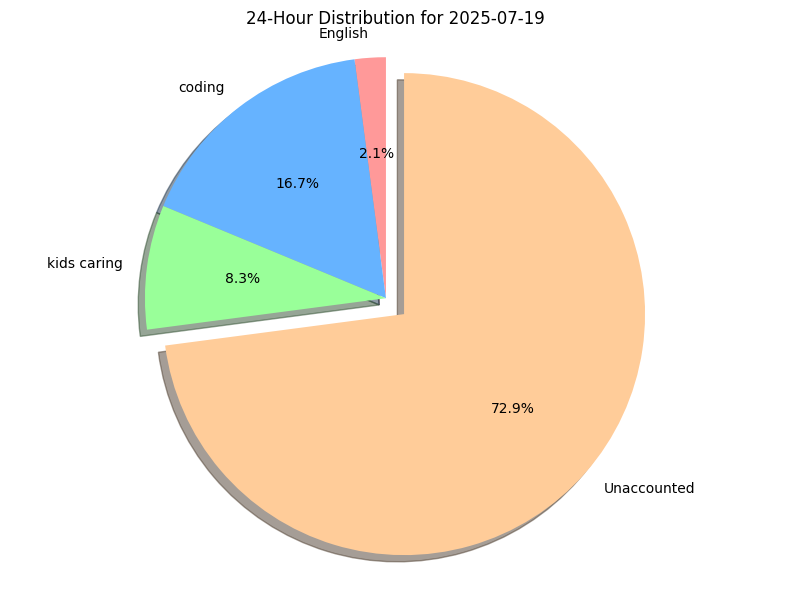


Hours distribution for 2025-07-19:
English: 0.5 hours (2.1%)
coding: 4.0 hours (16.7%)
kids caring: 2.0 hours (8.3%)
Unaccounted: 17.5 hours (72.9%)


In [21]:
#you prefer the cleaner, more visually appealing pie chart format from the earlier example. 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

try:
    # Read the CSV with semicolon separator
    df = pd.read_csv('my_energy.csv', sep=';',decimal=',')
    
    # Convert 'Hours' to numeric if it's not already
    df['Hours'] = pd.to_numeric(df['Hours'], errors='coerce')
    
    # Filter for a specific date if needed (using the first date in the dataset)
    unique_dates = df['Date'].unique()
    selected_date = unique_dates[0]  # You can change this to select a specific date
    
    # Filter data for the selected date
    day_df = df[df['Date'] == selected_date]
    
    # Group by Module and sum the hours for this day
    module_hours = day_df.groupby('Module')['Hours'].sum()
    
    # Calculate hours spent on tracked activities
    tracked_hours = module_hours.sum()
    
    # Add "Unaccounted" time to complete the 24 hours
    if tracked_hours < 24:
        module_hours['Unaccounted'] = 24 - tracked_hours
    
    # Prepare data for the pie chart
    labels = module_hours.index.tolist()
    sizes = module_hours.values
    
    # Create explode tuple - slightly emphasize the largest segment
    explode = [0] * len(labels)
    max_index = np.argmax(sizes)
    explode[max_index] = 0.1
    
    # Define a nice color palette
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f', '#f7b6d2']
    # Extend colors if needed
    if len(labels) > len(colors):
        colors = plt.cm.tab20(np.linspace(0, 1, len(labels)))
    
    # Create the pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors[:len(labels)], 
            autopct='%1.1f%%', shadow=True, startangle=90)
    
    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.axis('equal')
    plt.title(f'24-Hour Distribution for {selected_date}')
    plt.tight_layout()
    plt.show()
    
    # Print the breakdown
    print(f"\nHours distribution for {selected_date}:")
    for activity, hours in module_hours.items():
        print(f"{activity}: {hours} hours ({hours/24*100:.1f}%)")
    
except FileNotFoundError:
    print("Error: The file 'my_energy.csv' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")
    import traceback
    traceback.print_exc()

In [1]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from datetime import datetime

# Define the color palette you want to use
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f', '#f7b6d2']

# 1. Load and prepare data
try:
    # Load your data
    df = pd.read_csv('my_energy.csv', sep=';', decimal=',')
    
    # Convert 'Date' to datetime format
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Convert 'Hours' to numeric if needed
    df['Hours'] = pd.to_numeric(df['Hours'], errors='coerce')
    
    print("Data loaded successfully!")
    
except Exception as e:
    print(f"Error loading data: {e}")
    # Create sample data if loading fails
    df = pd.DataFrame({
        'Date': pd.date_range(start='2025-07-16', periods=7),
        'Module': ['Coding', 'English', 'Swedish', 'Job Hunting', 'Coding'] * 2,
        'Hours': [4, 2, 1, 3, 5, 3, 2, 1, 4, 2]
    })

# 2. Prepare Sankey data for day-to-activity flow
# Get unique dates and modules
unique_dates = df['Date'].dt.date.unique()
unique_modules = df['Module'].unique()

# Create nodes list: first all dates, then all modules
date_nodes = [str(date) for date in unique_dates]
module_nodes = unique_modules.tolist()
all_nodes = date_nodes + module_nodes

# Create source, target, and values lists
source = []
target = []
values = []

# For each date-module combination, create a flow
for i, date in enumerate(unique_dates):
    date_df = df[df['Date'].dt.date == date]
    
    for module in unique_modules:
        module_hours = date_df[date_df['Module'] == module]['Hours'].sum()
        
        if module_hours > 0:  # Only add if there are hours spent
            source.append(i)  # Index of the date in date_nodes
            target.append(len(date_nodes) + np.where(unique_modules == module)[0][0])  # Index of module in all_nodes
            values.append(module_hours)

# 3. Create node colors using our custom palette
node_colors = []

# Colors for date nodes (use first half of palette)
for i in range(len(date_nodes)):
    node_colors.append(colors[i % len(colors)])

# Colors for module nodes (use second half of palette)
for i in range(len(module_nodes)):
    node_colors.append(colors[(i + len(colors)//2) % len(colors)])

# 4. Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=18,
        thickness=15,
        line=dict(color="black", width=0.5),
        label=all_nodes,
        color=node_colors
    ),
    link=dict(
        source=source,
        target=target,
        value=values,
        # Color links based on source (date) color
        color=[node_colors[src] for src in source],
        hovertemplate='%{source.label} → %{target.label}<br>Hours: %{value}'
    )
)])

# Update layout
fig.update_layout(
    title_text="Daily Energy Flow by Activity",
    font_size=20,
    height=600
)

# Show the figure
fig.show()

Data loaded successfully!


In [4]:
import pandas as pd
import plotly.graph_objects as go
import random

# Load data
df = pd.read_csv('my_energy.csv', sep=';', decimal=',')

# Filter date range
start_date = '2025-07-16'
end_date = '2025-07-20'
df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].copy()
df_filtered['Outcome'] = df_filtered['Outcome'].fillna('No Outcome')

# Prepare nodes
dates = df_filtered['Date'].unique().tolist()
modules = df_filtered['Module'].unique().tolist()
outcomes = df_filtered['Outcome'].unique().tolist()
nodes = dates + modules + outcomes
node_indices = {name: idx for idx, name in enumerate(nodes)}

# Links: Date → Module
source_1 = [node_indices[row['Date']] for _, row in df_filtered.iterrows()]
target_1 = [node_indices[row['Module']] for _, row in df_filtered.iterrows()]
value_1 = df_filtered['Hours'].tolist()

# Links: Module → Outcome
source_2 = [node_indices[row['Module']] for _, row in df_filtered.iterrows()]
target_2 = [node_indices[row['Outcome']] for _, row in df_filtered.iterrows()]
value_2 = df_filtered['Hours'].tolist()

# Combine all
source = source_1 + source_2
target = target_1 + target_2
value = value_1 + value_2

# Colors
def generate_colors(n):
    return [f'hsl({random.randint(0, 360)}, {random.randint(70, 100)}%, {random.randint(50, 70)}%)' for _ in range(n)]
node_colors = generate_colors(len(nodes))

# Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(pad=20, thickness=20, line=dict(color='black', width=0.5), label=nodes, color=node_colors),
    link=dict(source=source, target=target, value=value,
              hovertemplate='%{source.label} → %{target.label}<br>Hours: %{value}<extra></extra>')
)])

fig.update_layout(
    title_text="<b>My Energy Flow: Date → Activity → Outcome</b>",
    title_font=dict(size=24, color='darkblue'),
    font=dict(size=14),
    hoverlabel=dict(bgcolor="white", font_size=13),
    plot_bgcolor='rgba(255,255,255,0.95)',
    paper_bgcolor='lavender'
)

fig.show()


In [4]:
!pip install kaleido==0.2.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 MB 9.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: kaleido
    Found existing installation: kaleido 1.0.0
    Uninstalling kaleido-1.0.0:
      Successfully uninstalled kaleido-1.0.0

[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [5]:
# Export the graph as an image
fig.write_image("my_energy_flow_week29.png")  # You can change the filename and format